In [2]:
pip install KModes

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, silhouette_score
from sklearn.datasets import load_iris
from kmodes.kmodes import KModes

In [11]:
# Part 1: K-Nearest Neighbors on Iris dataset
# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

In [12]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
# Predictions
y_pred = knn.predict(X_test)

In [17]:
# Evaluate model
print("KNN Evaluation Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.4f}%")
print(f"Precision: {precision_score(y_test, y_pred, average='macro')*100:.4f}%")
print(f"Recall: {recall_score(y_test, y_pred, average='macro')*100:.4f}%")
print(f"F1-score: {f1_score(y_test, y_pred, average='macro')*100:.4f}%")

KNN Evaluation Metrics:
Accuracy: 100.0000%
Precision: 100.0000%
Recall: 100.0000%
F1-score: 100.0000%


In [19]:
# Part 2: K-Modes Clustering on Customer Segmentation Data
# Generate a synthetic dataset for demonstration
data = pd.DataFrame({
    'Gender': np.random.choice(['Male', 'Female'], 200),
    'Age_Group': np.random.choice(['Teen', 'Adult', 'Senior'], 200),
    'Shopping_Habit': np.random.choice(['Online', 'In-Store'], 200)
})

# Encode categorical variables
label_encoders = {}
for col in data.columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Determine optimal K using cost function plot
costs = []
k_values = range(2, 10)
for k in k_values:
    km = KModes(n_clusters=k, init='Cao', n_init=5, verbose=0)
    km.fit_predict(data)
    costs.append(km.cost_)

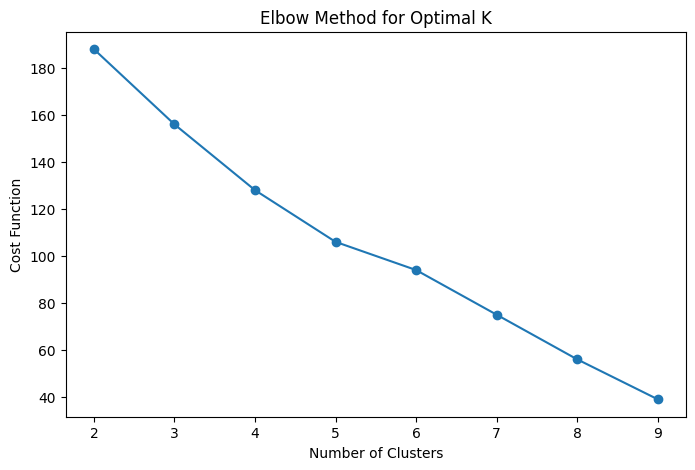

In [20]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, costs, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Cost Function')
plt.title('Elbow Method for Optimal K')
plt.show()

In [21]:
# Fit K-Modes with optimal K (assuming K=3 from elbow method)
k_optimal = 3
km = KModes(n_clusters=k_optimal, init='Cao', n_init=5, verbose=0)
clusters = km.fit_predict(data)

In [22]:
# Evaluate clustering using silhouette score
sil_score = silhouette_score(data, clusters, metric='hamming')
print(f"K-Modes Silhouette Score: {sil_score:.4f}")

K-Modes Silhouette Score: 0.2165
